<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_sales_data(file_path):
    sales_data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            sale = {}
            parts = line.lstrip('\ufeff').strip().split(',')
            sale['product_name'] = parts[0]
            sale['quantity'] = int(parts[1])
            sale['price'] = int(parts[2])
            sale['date'] = parts[3]
            sales_data.append(sale)
    return sales_data

In [4]:
sales_data = read_sales_data('C:/Users/KosinskiiKI/input.csv')

In [5]:
def total_sales_per_product(sales_data):
    total_sales = {}
    for sale in sales_data:
        if sale['product_name'] not in total_sales:
            total_sales[sale['product_name']] = sale['quantity'] * sale['price']
        else:
            total_sales[sale['product_name']] += sale['quantity'] * sale['price']
    return total_sales

In [6]:
total_sales_per_product = total_sales_per_product(sales_data)

In [7]:
def sales_over_time(sales_data):
    sales_over_time = {}
    for sale in sales_data:
        if sale['date'] not in sales_over_time:
            sales_over_time[sale['date']] = sale['quantity'] * sale['price']
        else:
            sales_over_time[sale['date']] += sale['quantity'] * sale['price']
    return sales_over_time

In [8]:
sales_over_time = sales_over_time(sales_data)

In [10]:
# Получение максимального значения словаря
def get_max_item(dict):
    max_val = max(dict.values())
    for key, value in dict.items():
        if value == max_val:
            return key, value

print(f'Наибольшую выручку принес продукт: {get_max_item(total_sales_per_product)[0]} с общей суммой продаж: {get_max_item(total_sales_per_product)[1]} у.е.')
print(f'Наибольшая сумма продаж зафиксирована: {get_max_item(sales_over_time)[0]} с общей суммой продаж: {get_max_item(sales_over_time)[1]} у.е.')

Наибольшую выручку принес продукт: сливы с общей суммой продаж: 705 у.е.
Наибольшая сумма продаж зафиксирована: 2024-06-20 с общей суммой продаж: 698 у.е.


In [13]:
# ======================================================================================================
# Вариант с Pandas сильно удобнее
df = pd.read_csv(
    'C:/Users/KosinskiiKI/input.csv', 
    names=['product_name', 'quantity', 'price', 'date'])
df['total_sum'] = df['quantity'] * df['price']
# группировка по продукту
df_grouped_product = df.groupby('product_name', as_index=False)['total_sum'].sum()
# группировка по дате
df_grouped_date = df.groupby('date', as_index=False)['total_sum'].sum()

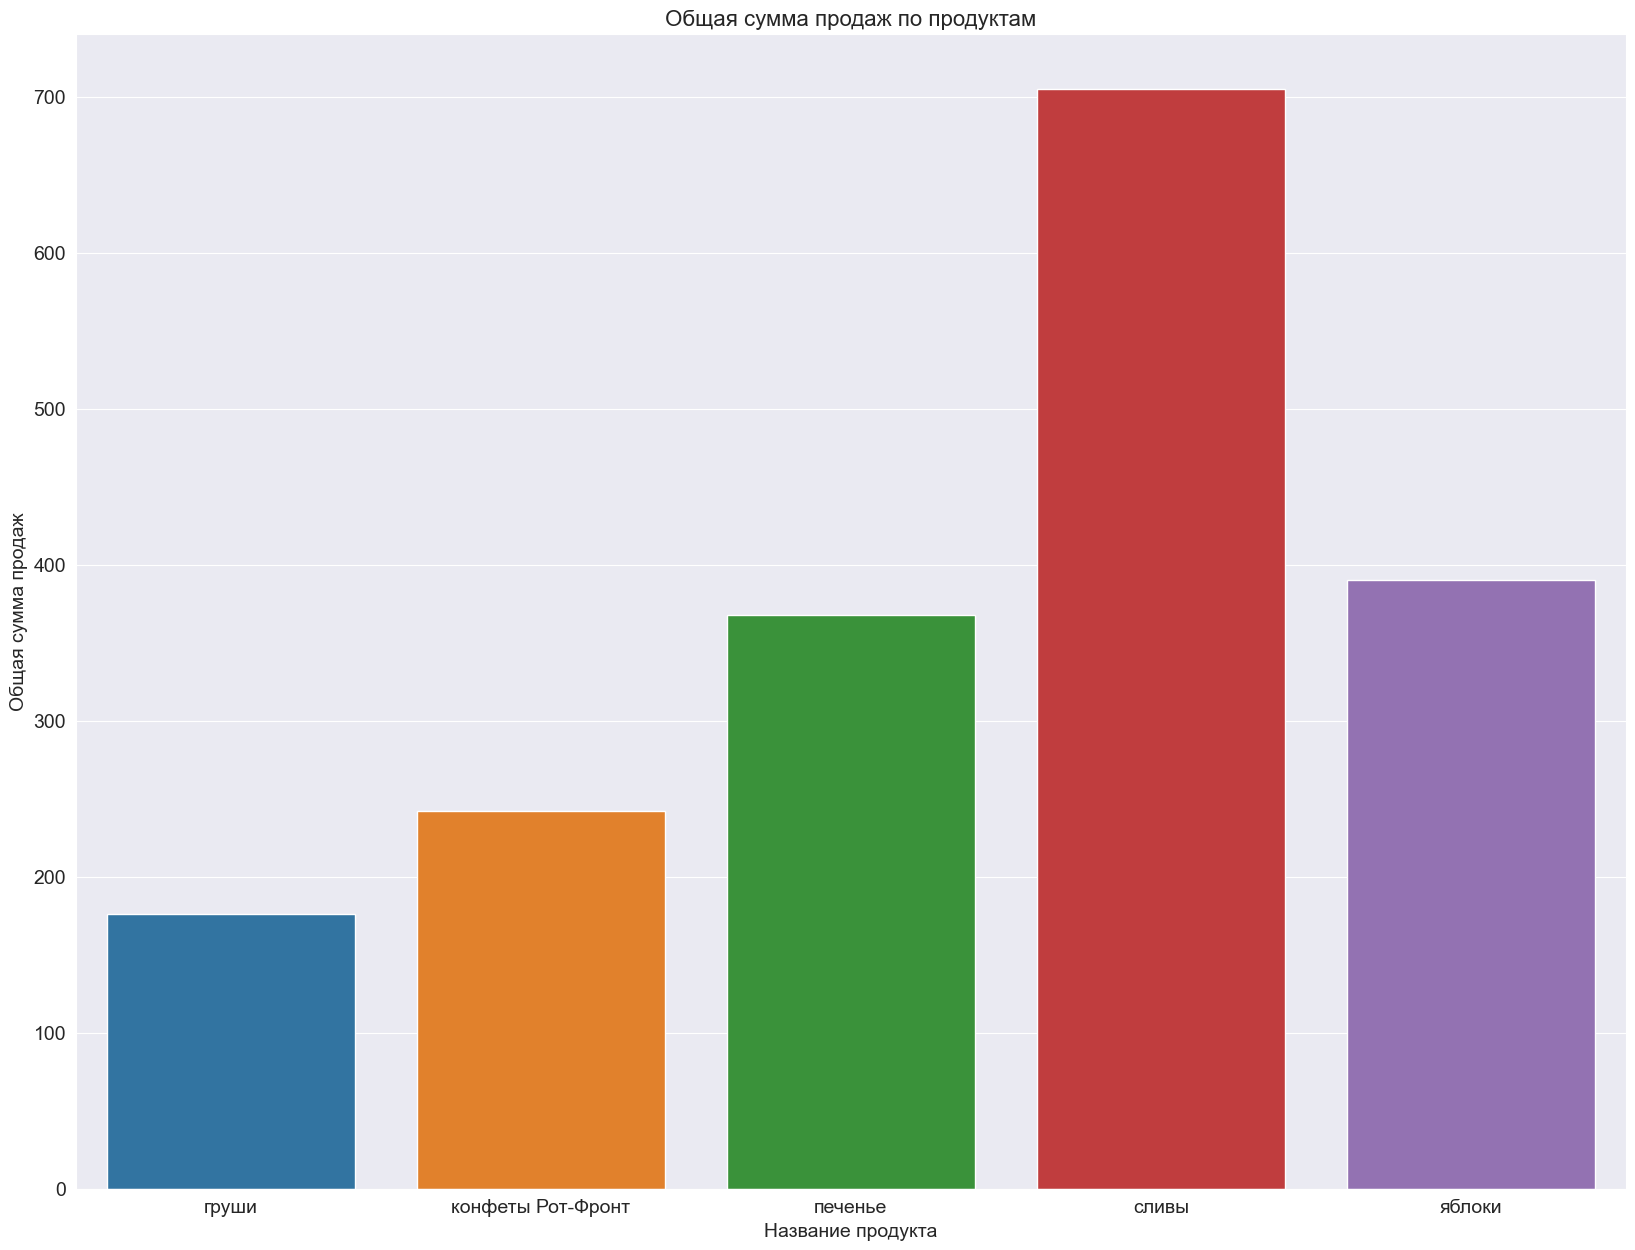

In [14]:
# График Общей суммы продаж по продуктам
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.title('Общая сумма продаж по продуктам', fontsize=16)
sns.barplot(
    x = df_grouped_product['product_name'], 
    y = df_grouped_product['total_sum'], 
    data = df_grouped_product
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Название продукта', fontsize=14)  
plt.ylabel('Общая сумма продаж', fontsize=14)  

plt.show()

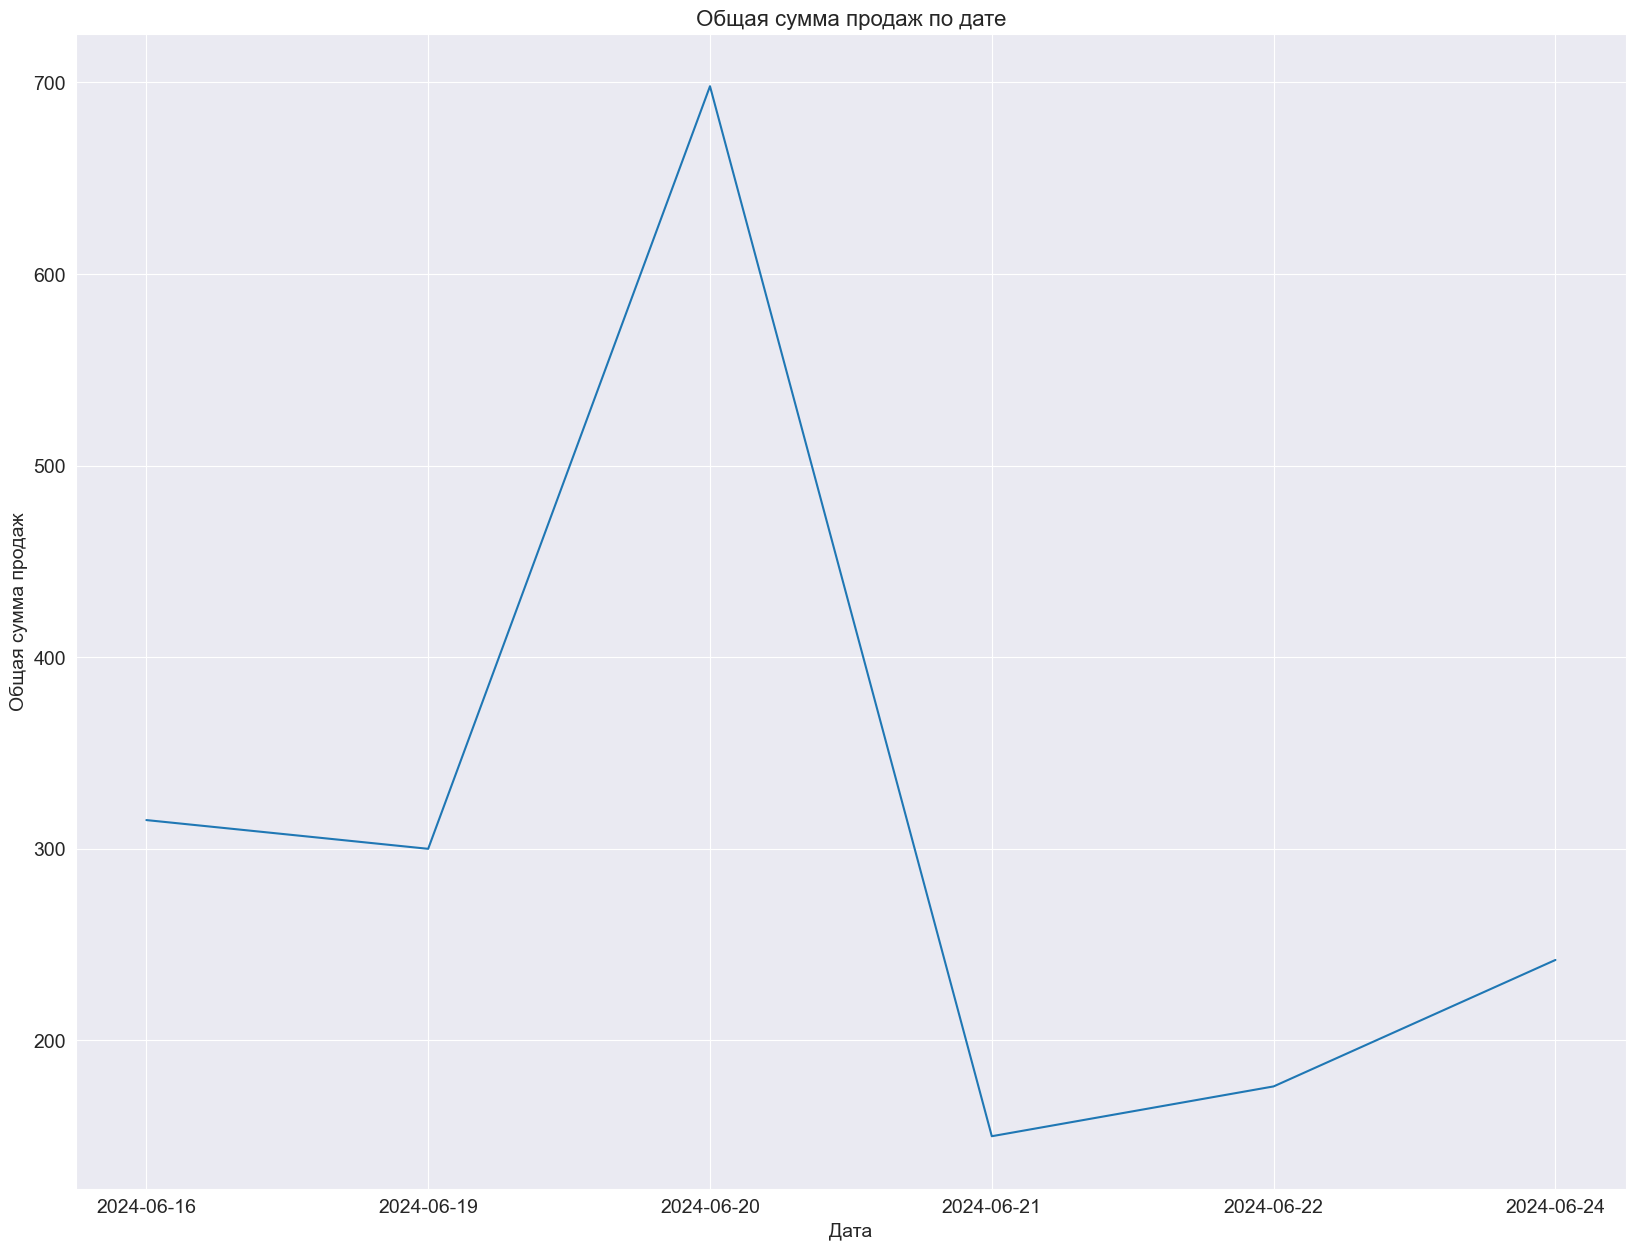

In [15]:
# График Общей суммы продаж по дате
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.title('Общая сумма продаж по дате', fontsize=16)
sns.lineplot(
    x = df_grouped_date['date'], 
    y = df_grouped_date['total_sum'], 
    data = df_grouped_date
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Дата', fontsize=14)  
plt.ylabel('Общая сумма продаж', fontsize=14)  

plt.show()